CS 543 Final Project
Implementing "An Approach for Enhancement of Low Contrast Gray Scale Image Using Fuzzy Logic and Sigmoid Function"
https://ieeexplore-ieee-org.proxy2.library.illinois.edu/document/10532836

In [539]:
#imports
import cv2
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt 

In [540]:
def normalize(im):
    min = np.min(im)
    max = np.max(im)

    assert min != max, "Min equal to max, so will have divide by zero"

    return (im - min) / (max - min)

In [541]:
def gaus_member_func(im):
    return np.exp(-0.5 * ((im - np.mean(im))/ np.std(im))**2)

In [542]:
def gaussian_membership_function(x, c, s):
    return np.exp(-((x - c)**2) / (2 * s**2))


In [543]:
# def fuzzification(im):
#     return im / gaus_member_func(im)

In [544]:
def sigmoid_func(gauss_members, g):
    denom = 1 + np.exp(-g*gauss_members)
    return 1 / denom

In [545]:
def contrast_adjust(gauss_members, z, sigmoid):
    '''
    private function used for fuzzy_logic_with_sigmoid
    z: is the mean of the Gaussian membership function
    sigmoid: is the 2d 
    '''
    sig_times_mean = z * sigmoid
    print(f"sig times mean shape: {sig_times_mean.shape}")
    return gauss_members + (gauss_members * sig_times_mean)

In [546]:
def fuzzy_logic_with_sigmoid(im, enhancement=.3):
    '''
    Does contrast adjustment for a image using fuzzy logic and modified sigmoid
    source: https://ieeexplore-ieee-org.proxy2.library.illinois.edu/document/10532836/authors#authors
    Note: function performs an inverse of result because color flips for some reason

    im: is the grayscale image (with values between 0-1)

    returns: normalized contrast adjust image
    '''
    gmf = gaus_member_func(im)
    z = np.mean(gmf)
    sigmoid = sigmoid_func(gmf, enhancement)
    res =1 - contrast_adjust(gmf, z, sigmoid)   #inverse because color flips for some reason
    return normalize(res)


In [547]:
# Perform fuzzification of the input image

# image = cv2.imread('path_to_image.jpg')
image = [[220,240,254],[255,250,255]]
image = normalize(image)
image

array([[0.        , 0.57142857, 0.97142857],
       [1.        , 0.85714286, 1.        ]])

In [548]:
# Parameters for the Gaussian function 
mean = np.mean(image) 
std_dev = np.std(image)
GMF_test = gaus_member_func(image)
fuzzified_image = gaussian_membership_function(image, mean, std_dev)
print(GMF_test)
print(fuzzified_image)

[[0.12579811 0.90388879 0.80369819]
 [0.76023638 0.94262107 0.76023638]]
[[0.12579811 0.90388879 0.80369819]
 [0.76023638 0.94262107 0.76023638]]


In [549]:
res = fuzz.membership.gaussmf(image, np.mean(image), np.std(image))
res

array([[0.12579811, 0.90388879, 0.80369819],
       [0.76023638, 0.94262107, 0.76023638]])

In [550]:
gs = [0.0001,.1, .2, .3,.5, .9, 1, 5]
for g in gs:
    res = sigmoid_func(GMF_test, g)
    print(f"g={g}")
    print(res)

g=0.0001
[[0.50000314 0.5000226  0.50002009]
 [0.50001901 0.50002357 0.50001901]]
g=0.1
[[0.50314491 0.52258185 0.52008165]
 [0.51899676 0.52354809 0.51899676]]
g=0.2
[[0.50628957 0.54507176 0.54009861]
 [0.53793876 0.54699196 0.53793876]]
g=0.3
[[0.50943374 0.56737929 0.55998704]
 [0.55677185 0.5702292  0.55677185]]
g=0.5
[[0.51571958 0.61110143 0.59913184]
 [0.59390161 0.6156939  0.59390161]]
g=0.9
[[0.52827438 0.69285481 0.67333953]
 [0.66467829 0.70022278 0.66467829]]
g=1
[[0.53140812 0.71174799 0.690765  ]
 [0.68140505 0.7196288  0.68140505]]
g=5
[[0.65226054 0.98922234 0.9823375 ]
 [0.97814401 0.99110301 0.97814401]]


In [551]:
res_s = sigmoid_func(GMF_test, g=.3)
res = contrast_adjust(GMF_test, np.mean(GMF_test), res_s)
#res = normalize(res)
res

sig times mean shape: (2, 3)


array([[0.17168867, 1.27112873, 1.12597748],
       [1.06333736, 1.32752118, 1.06333736]])

In [552]:
#check the math
print(f" mean of GMF = {np.mean(GMF_test)}")
y = GMF_test[1,1] + (GMF_test[1,1] * np.mean(GMF_test) * res_s[1,1])
print(f"y[1,1]={y}")

 mean of GMF = 0.7160798184260976
y[1,1]=1.327521175288267


max is 1.0, min 0.0


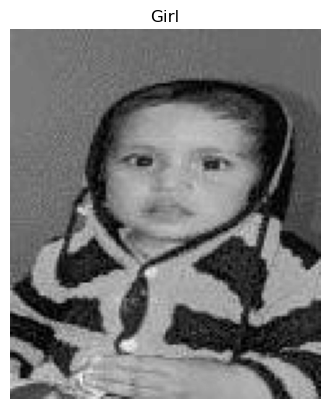

In [553]:
im_gray = cv2.imread('girl.jpg', cv2.IMREAD_GRAYSCALE)
im_gray = normalize(im_gray)
print(f"max is {np.max(im_gray)}, min {np.min(im_gray)}")
plt.imshow(im_gray, cmap='gray') # Use cmap='gray' for grayscale images
plt.title('Girl') # Set the title of the plot
plt.axis('off') # Hide the axes
plt.show() # Show the plot

sig times mean shape: (143, 120)
output shape  =(143, 120)


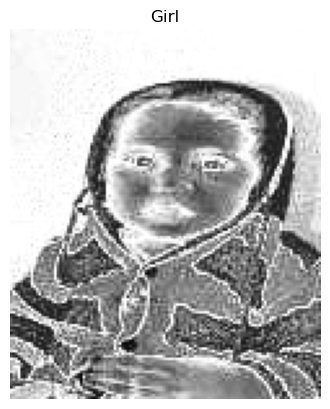

sig times mean shape: (143, 120)
output shape  =(143, 120)


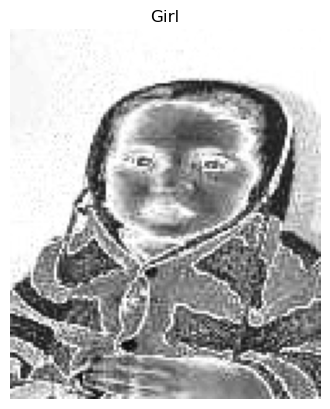

sig times mean shape: (143, 120)
output shape  =(143, 120)


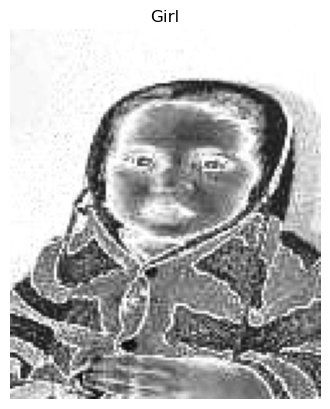

sig times mean shape: (143, 120)
output shape  =(143, 120)


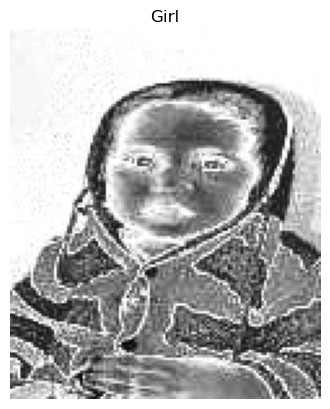

sig times mean shape: (143, 120)
output shape  =(143, 120)


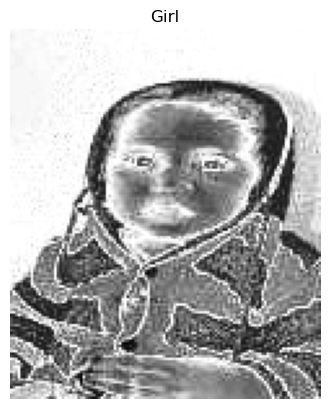

sig times mean shape: (143, 120)
output shape  =(143, 120)


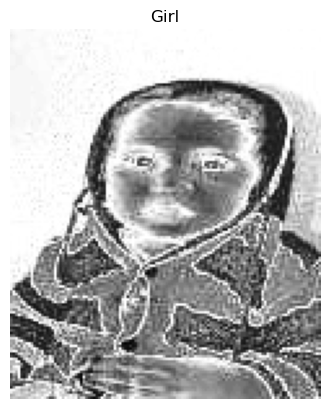

In [554]:
gs = [0.0001 ,.1 ,.5, .9, 1, 5]
for g in gs:
    res = 1 - fuzzy_logic_with_sigmoid(im_gray, enhancement=g)
    print(f"output shape  ={res.shape}")


    plt.imshow(res, cmap='gray') # Use cmap='gray' for grayscale images
    plt.title('Girl') # Set the title of the plot
    plt.axis('off') # Hide the axes
    plt.show() # Show the plot

In [555]:
image_name_bub = 'removed_bg.png'

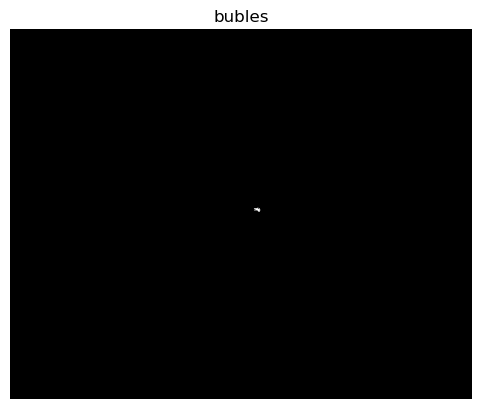

In [556]:
im_gray = cv2.imread(image_name_bub, cv2.IMREAD_GRAYSCALE)
im_gray = normalize(im_gray)
plt.imshow(im_gray, cmap='gray') # Use cmap='gray' for grayscale images
plt.title('bubles') # Set the title of the plot
plt.axis('off') # Hide the axes
plt.show() # Show the plot

sig times mean shape: (512, 640)


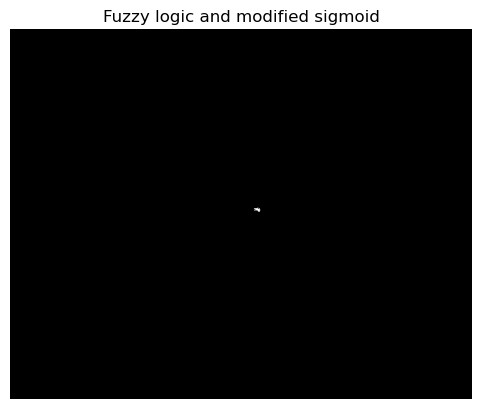

In [557]:

gs = [.3]
for g in gs:
    res = fuzzy_logic_with_sigmoid(im_gray, enhancement=g)


    plt.imshow(res, cmap='gray') # Use cmap='gray' for grayscale images
    plt.title('Fuzzy logic and modified sigmoid') # Set the title of the plot
    plt.axis('off') # Hide the axes
    plt.show() # Show the plot

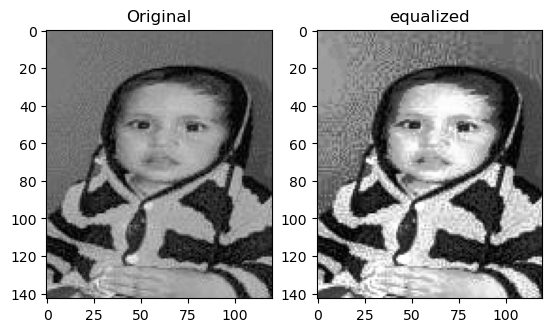

In [558]:
# Load the image 
image = cv2.imread('girl.jpg') 
  
#Plot the original image 
plt.subplot(1, 2, 1) 
plt.title("Original") 
# Convert the image to grayscale 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray_image,  cmap='gray') 
  

  
# Equalize the histogram 
equalized_image = cv2.equalizeHist(gray_image) 
  
#Save the equalized image 
cv2.imwrite('equalized.jpg', equalized_image) 
  
#Plot the equalized image 
plt.subplot(1, 2, 2) 
plt.title("equalized") 
plt.imshow(equalized_image, cmap='gray') 
plt.show()

## Background subtraction


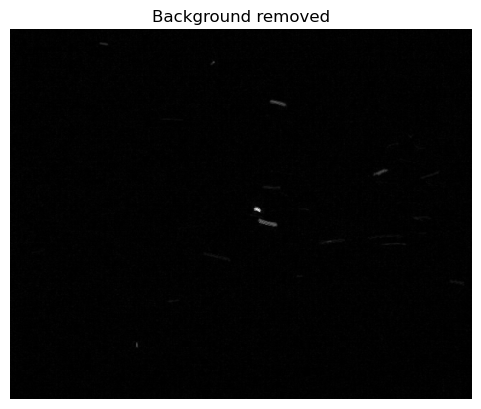

In [559]:
background = cv2.imread('empty_image_0_2460.png', cv2.IMREAD_GRAYSCALE)
foreground = cv2.imread('image_0_2204.png', cv2.IMREAD_GRAYSCALE)

diff = cv2.absdiff(background, foreground)

cv2.imwrite("removed_bg.png", diff)

plt.figure()
plt.imshow(diff, cmap='gray')
plt.title(f'Background removed')
plt.axis('off')
plt.show() 

## Compare different methods

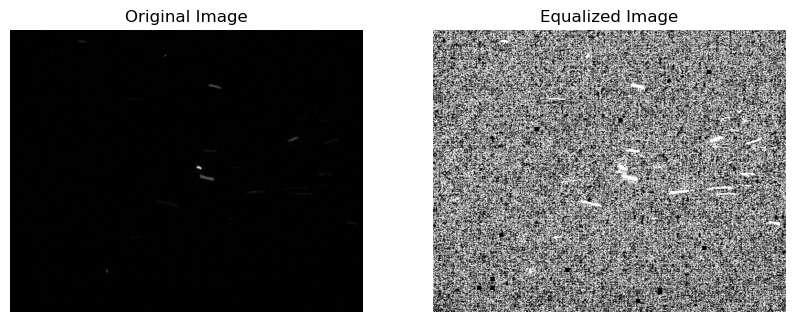

In [560]:
#contrast adjustment
image = diff

# Apply Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()


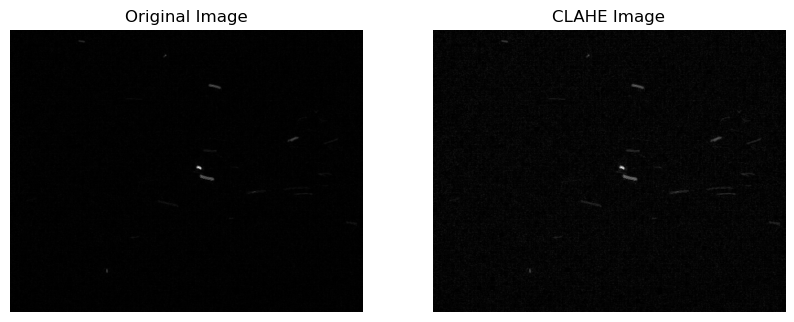

In [561]:

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

# Display the original and CLAHE images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image')
plt.axis('off')

plt.show()


sig times mean shape: (512, 640)


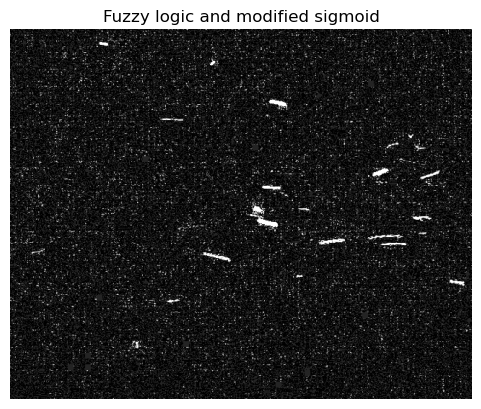

In [566]:
image_norm = normalize(image)
res = fuzzy_logic_with_sigmoid(image_norm, enhancement=.3)


plt.imshow(res, cmap='gray') # Use cmap='gray' for grayscale images
plt.title('Fuzzy logic and modified sigmoid') # Set the title of the plot
plt.axis('off') # Hide the axes
plt.show() # Show the plot

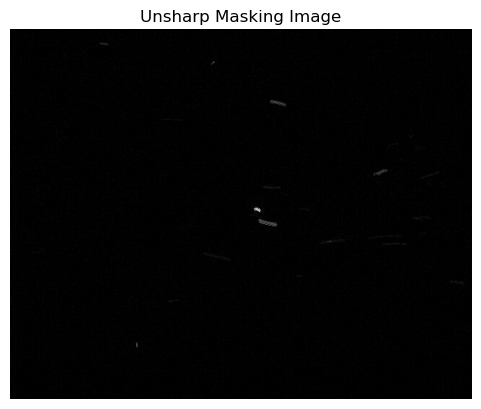

In [567]:
#Unsharp Masking
blurred = cv2.GaussianBlur(image, (5, 5), 1.5)
sharpened_image = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

plt.imshow(sharpened_image, cmap='gray')
plt.title('Unsharp Masking Image')
plt.axis('off')
plt.show()


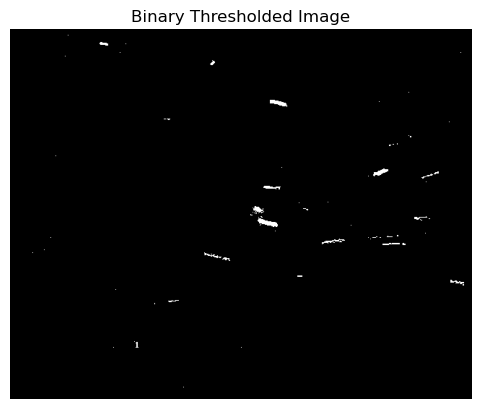

In [578]:
_, thresholded_image = cv2.threshold(image, 8, 255, cv2.THRESH_BINARY)

plt.imshow(thresholded_image, cmap='gray')
plt.title('Binary Thresholded Image')
plt.axis('off')
plt.show()


In [4]:
.5*2.3 + .1

1.25